<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/oct7/Tarea7oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

librería emcee

In [ ]:
! pip install corner

In [ ]:
! pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [ ]:
data = np.loadtxt("drive/MyDrive/Cosas ML/olympic100m_men.txt",delimiter=',').T

In [ ]:
x=data[0]
y=data[1]

In [ ]:
x=(x-np.mean(x))/np.std(x)

In [ ]:
yerr = 0.1 + 0.5 * np.random.rand(27)

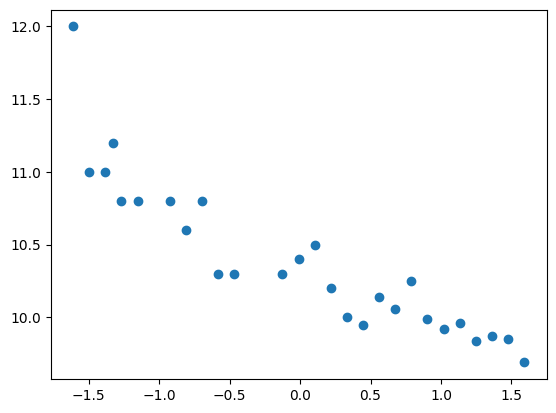

In [ ]:
plt.scatter(x,y)

In [ ]:
x

array([-1.61025838, -1.49599563, -1.38173288, -1.3246015 , -1.26747013,
       -1.15320738, -0.92468188, -0.81041913, -0.69615638, -0.58189363,
       -0.46763088, -0.12484263, -0.01057988,  0.10368287,  0.21794561,
        0.33220836,  0.44647111,  0.56073386,  0.67499661,  0.78925936,
        0.90352211,  1.01778486,  1.13204761,  1.24631036,  1.36057311,
        1.47483586,  1.58909861])

In [ ]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [ ]:
inicial1 = np.array([5, 0, np.log(0.000000000001)])
inicial1

array([  5.        ,   0.        , -27.63102112])

Maximum likelihood estimates:
m = -0.411
b = 10.343
f = 0.000


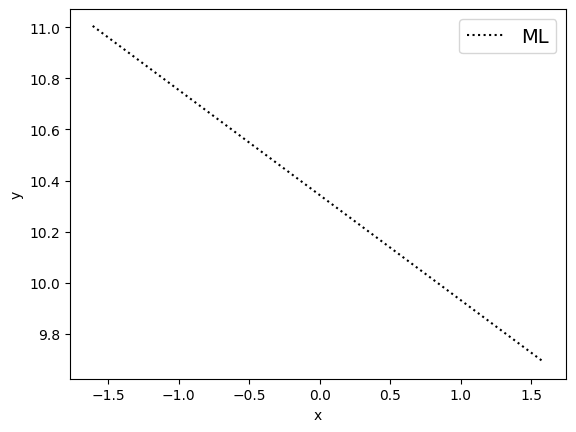

In [ ]:
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
soln = minimize(nll, inicial1, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.plot(x, np.dot(np.vander(x, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y");

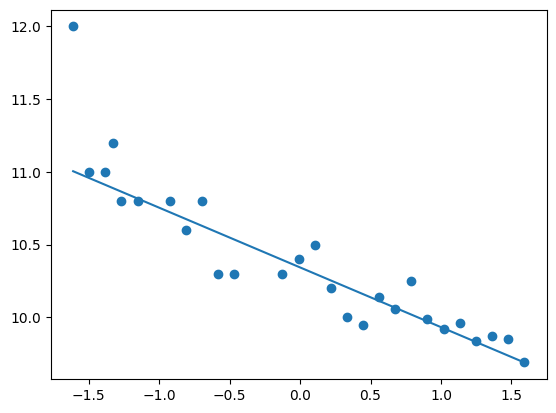

In [ ]:
plt.plot(x, m_ml * x + b_ml)
plt.scatter(x,y)

In [ ]:
def log_prior(theta):
    m, b, log_f = theta
    if -40.0 < m < 40. and 40.0 < b < 40.0 and -10.0 < log_f < 10.0:
        return 0.0
    return -np.inf

In [ ]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [ ]:
pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:03<00:00, 1402.34it/s]


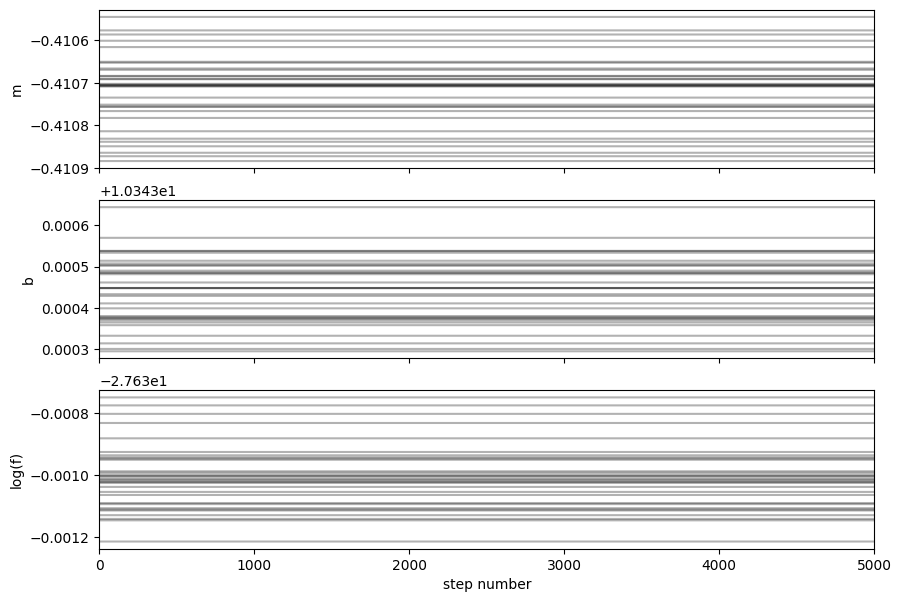

In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


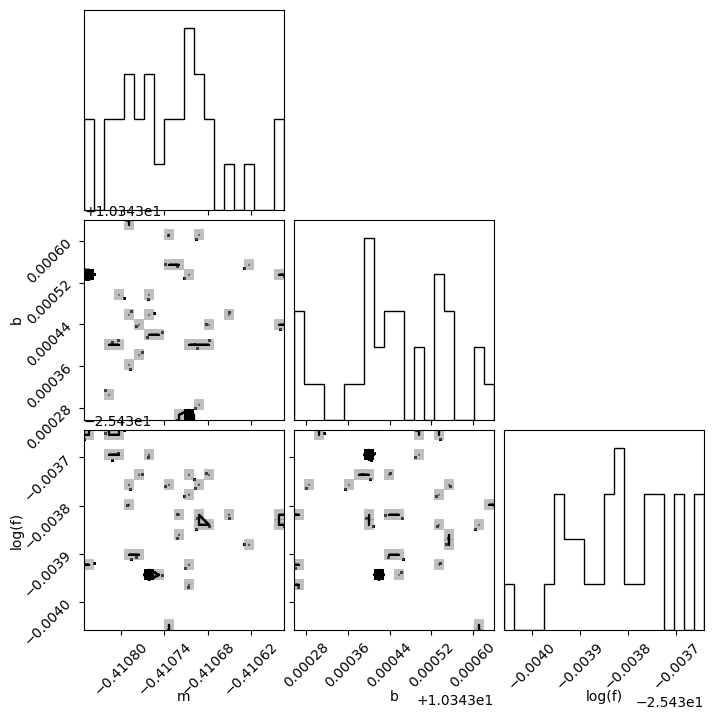

In [ ]:
fig = corner.corner(
    flat_samples, labels=labels, truths=[-0.411, 10.343, 0]
);

In [ ]:
np.random.randn(32, 3)

array([[ 0.21409374, -1.24573878,  0.17318093],
       [ 0.38531738, -0.88385744,  0.15372511],
       [ 0.05820872, -1.1429703 ,  0.35778736],
       [ 0.56078453,  1.08305124,  1.05380205],
       [-1.37766937, -0.93782504,  0.51503527],
       [ 0.51378595,  0.51504769,  3.85273149],
       [ 0.57089051,  1.13556564,  0.95400176],
       [ 0.65139125, -0.31526924,  0.75896922],
       [-0.77282521, -0.23681861, -0.48536355],
       [ 0.08187414,  2.31465857, -1.86726519],
       [ 0.68626019, -1.61271587, -0.47193187],
       [ 1.0889506 ,  0.06428002, -1.07774478],
       [-0.71530371,  0.67959775, -0.73036663],
       [ 0.21645859,  0.04557184, -0.65160035],
       [ 2.14394409,  0.63391902, -2.02514259],
       [ 0.18645431, -0.66178646,  0.85243333],
       [-0.79252074, -0.11473644,  0.50498728],
       [ 0.86575519, -1.20029641, -0.33450124],
       [-0.47494531, -0.65332923,  1.76545424],
       [ 0.40498171, -1.26088395,  0.91786195],
       [ 2.1221562 ,  1.03246526, -1.519

In [ ]:
yerr

array([0.38385747, 0.14242973, 0.41879014, 0.45767498, 0.37937022,
       0.33896853, 0.42669395, 0.15419681, 0.41120522, 0.4030541 ,
       0.13415816, 0.4531233 , 0.36722656, 0.36491583, 0.14936316,
       0.57942556, 0.31148982, 0.39213537, 0.44974388, 0.1638513 ,
       0.2268928 , 0.10055305, 0.53954315, 0.14277469, 0.59922508,
       0.40714923, 0.35715658])